<a href="https://colab.research.google.com/github/Jagroop2001/PyTorch-Learning/blob/master/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

In [11]:
what_we_are_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting model to data (training)",
    4: "making preductuins and evaluting a model (inference)",
    5: "save and load a model",
    6: "putting it all togeather"
}

In [12]:
import torch
from torch import nn # nn contains all of PyTorch's building for neural networks
import matplotlib.pyplot as plt

# Check PyTorch Version
torch.__version__

'2.1.0+cu118'

## 1. Data (Preparing and Loading)


Data can be almost anything.

- Excel Spreadsheet
- Images of any kind
- Videos (Youtube has lot's of data ..)
- Audio like songs and postcasts
- DNA
- Text

In [13]:
weight  = 0.7
bias  = 0.3

start=0
end =1
step =0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X +bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [14]:
len(X), len(y)

(50, 50)

## Spliting Data into training and test set

In [15]:
# Create a train/test split
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split] , y[:train_split]
X_test, y_test = X[train_split:],X[train_split:]

len(X_train), len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

## Data Visualization

In [16]:
def plot_predictions(train_data=X_train,train_labels=y_train,
                     test_data=X_test,test_labels=y_test,predictions=None):
  """
  Plots Training data, test data and compare predictions
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',s=4,label="Training Data")

  plt.scatter(test_data,test_labels,c='g',s=4,label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4, label="Predictions")

  plt.legend()

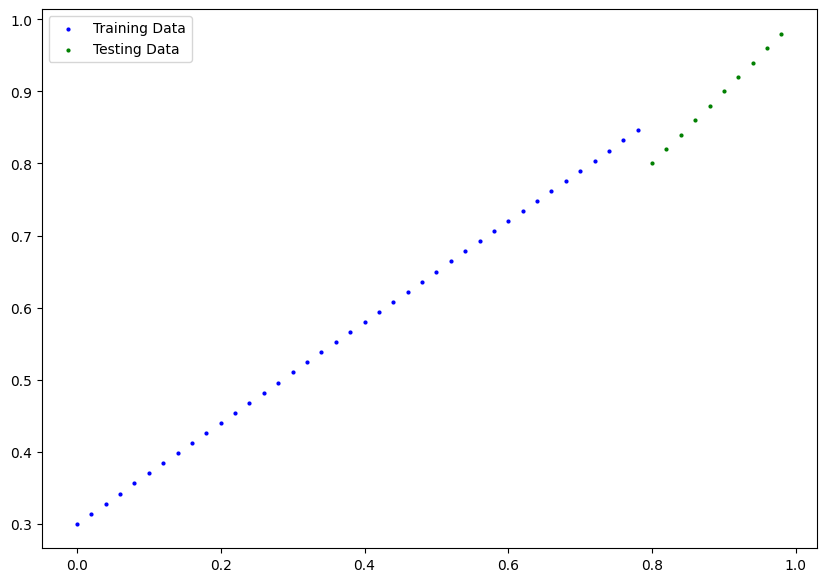

In [17]:
plot_predictions()

## 2. Build model

In [35]:
# Create linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights= nn.Parameter(torch.randn(1, requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias

In [36]:
# Creating a random seed :
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

In [37]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [38]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [39]:
## Make predictions

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [40]:
y_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

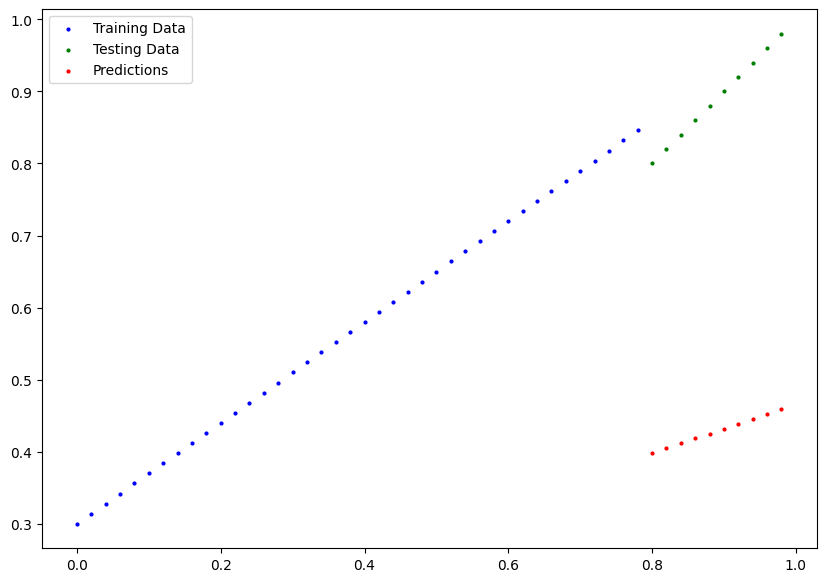

In [41]:
plot_predictions(predictions=y_preds)